# Project 1

## Step 1: Load the data and perform basic operations.

##### 1. Load the data in using pandas.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
act = pd.read_csv("../data/act.csv")
sat = pd.read_csv("../data/sat.csv")

In [4]:
act.drop(columns="Unnamed: 0", axis=1, inplace=True)

In [7]:
sat.drop(columns="Unnamed: 0", axis=1, inplace=True)

##### 2. Print the first ten rows of each dataframe.

In [9]:
act.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4


In [10]:
sat.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055


##### 3. Describe in words what each variable (column) is.

The datasets contain the participation rate and average component/total test scores by state for a single year.

##### 4. Does the data look complete? Are there any obvious issues with the observations?

The SAT dataset does not include a row for national scores/totals.

In [10]:
act.isnull().sum()

State            0
Participation    0
English          0
Math             0
Reading          0
Science          0
Composite        0
dtype: int64

##### 5. Print the types of each column.

In [11]:
act.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null float64
dtypes: float64(5), object(2)
memory usage: 2.9+ KB


##### 6. Do any types need to be reassigned? If so, go ahead and do it.

In [11]:
act['Participation'] = act['Participation'].map(lambda x: float(x[:-1]))

In [12]:
act.head(5)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60.0,20.3,20.7,21.4,21.0,21.0
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4


In [13]:
sat['Participation'] = sat['Participation'].map(lambda x: float(x[:-1]))

In [14]:
sat.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5.0,593,572,1165
1,Alaska,38.0,547,533,1080
2,Arizona,30.0,563,553,1116
3,Arkansas,3.0,614,594,1208
4,California,53.0,531,524,1055


##### 7. Create a dictionary for each column mapping the State to its respective value for that column. (For example, you should have three SAT dictionaries.)

In [98]:
sat_math = {}
sat_ebrw = {}
sat_total = {}
for index in sat.index:
    sat_math[sat.loc[index,'State']]=sat.loc[index,'Math']
    sat_ebrw[sat.loc[index,'State']]=sat.loc[index,'Evidence-Based Reading and Writing']
    sat_total[sat.loc[index,'State']]=sat.loc[index,'Total']

In [99]:
sat['Evidence-Based Reading and Writing'] = sat['Evidence-Based Reading and Writing'].astype(float)
sat['Math'] = sat['Math'].astype(float)
sat['Total'] = sat['Total'].astype(float)

In [29]:
sat.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5.0,593.0,572.0,1165.0
1,Alaska,38.0,547.0,533.0,1080.0
2,Arizona,30.0,563.0,553.0,1116.0
3,Arkansas,3.0,614.0,594.0,1208.0
4,California,53.0,531.0,524.0,1055.0


##### 8. Create one dictionary where each key is the column name, and each value is an iterable (a list or a Pandas Series) of all the values in that column.

In [162]:
sat_dict = {}
for column in sat.columns:
    sat_dict[column] = sat[column].values

In [163]:
sat_dict

{'State': array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
        'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
        'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
        'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
        'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
        'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
        'New Jersey', 'New Mexico', 'New York', 'North Carolina',
        'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
        'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
        'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
        'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object),
 'Participation': array([  5.,  38.,  30.,   3.,  53.,  11., 100., 100., 100.,  83.,  61.,
         55.,  93.,   9.,  63.,   2.,   4.,   4.,   4.,  95.,  69.,  76.,
        100.,   3.,   2.,   3.,  10.,   3.,  26.,  96.,  70.,  11.,  67.,
  

In [32]:
pd.DataFrame(sat_dict).head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5.0,593.0,572.0,1165.0
1,Alaska,38.0,547.0,533.0,1080.0
2,Arizona,30.0,563.0,553.0,1116.0
3,Arkansas,3.0,614.0,594.0,1208.0
4,California,53.0,531.0,524.0,1055.0


In [33]:
sat.columns

Index(['State', 'Participation', 'Evidence-Based Reading and Writing', 'Math',
       'Total'],
      dtype='object')

##### 9. Merge the dataframes on the state column.

In [104]:
act['State'].head()

1       Alabama
2        Alaska
3       Arizona
4      Arkansas
5    California
Name: State, dtype: object

In [21]:
act.drop(0, axis=0, inplace = False)

In [34]:
merged_df = pd.DataFrame.merge(act, right=sat, how = "inner", on = "State")

In [35]:
merged_df.head()

,State,Participation_x,English,Math_x,Reading,Science,Composite,Participation_y,Evidence-Based Reading and Writing,Math_y,Total
0,Alabama,100.0,18.9,18.4,19.7,19.4,19.2,5.0,593.0,572.0,1165.0
1,Alaska,65.0,18.7,19.8,20.4,19.9,19.8,38.0,547.0,533.0,1080.0
2,Arizona,62.0,18.6,19.8,20.1,19.8,19.7,30.0,563.0,553.0,1116.0
3,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4,3.0,614.0,594.0,1208.0
4,California,31.0,22.5,22.7,23.1,22.2,22.8,53.0,531.0,524.0,1055.0


##### 10. Change the names of the columns so you can distinguish between the SAT columns and the ACT columns.

In [36]:
merged_df.columns

Index(['State', 'Participation_x', 'English', 'Math_x', 'Reading', 'Science',
       'Composite', 'Participation_y', 'Evidence-Based Reading and Writing',
       'Math_y', 'Total'],
      dtype='object')

In [37]:
merged_df.columns = ['State', 'Participation_ACT', 'English_ACT', 'Math_ACT', 'Reading_ACT', 'Science_ACT',
       'Composite_ACT', 'Participation_SAT', 'Evidence-Based Reading and Writing_SAT',
       'Math_SAT', 'Total_SAT']

In [38]:
merged_df.tail(5)

,State,Participation_ACT,English_ACT,Math_ACT,Reading_ACT,Science_ACT,Composite_ACT,Participation_SAT,Evidence-Based Reading and Writing_SAT,Math_SAT,Total_SAT
46,Virginia,29.0,23.5,23.3,24.6,23.5,23.8,65.0,561.0,541.0,1102.0
47,Washington,29.0,20.9,21.9,22.1,22.0,21.9,64.0,541.0,534.0,1075.0
48,West Virginia,69.0,20.0,19.4,21.2,20.5,20.4,14.0,558.0,528.0,1086.0
49,Wisconsin,100.0,19.7,20.4,20.6,20.9,20.5,3.0,642.0,649.0,1291.0
50,Wyoming,100.0,19.4,19.8,20.8,20.6,20.2,3.0,626.0,604.0,1230.0


##### 11. Print the minimum and maximum of each numeric column in the data frame.

In [167]:
merged_df.iloc[:,3:].min()

Participation_ACT                           8.0
English_ACT                                16.3
Math_ACT                                   18.0
Reading_ACT                                18.1
Science_ACT                                18.2
Composite_ACT                              17.8
Participation_SAT                           2.0
Evidence-Based Reading and Writing_SAT    482.0
Math_SAT                                  468.0
Total_SAT                                 950.0
dtype: float64

In [166]:
merged_df.iloc[:,3:].max()

Participation_ACT                          100.0
English_ACT                                 25.5
Math_ACT                                    25.3
Reading_ACT                                 26.0
Science_ACT                                 24.9
Composite_ACT                               25.5
Participation_SAT                          100.0
Evidence-Based Reading and Writing_SAT     644.0
Math_SAT                                   651.0
Total_SAT                                 1295.0
dtype: float64

##### 12. Write a function using only list comprehensions, no loops, to compute standard deviation. Using this function, calculate the standard deviation of each numeric column in both data sets. Add these to a list called `sd`.

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

In [43]:
def st_dev(series):
    mean = series.mean()
    n = series.size
    ssd = np.sum([(x-mean)**2 for x in series])
    return np.sqrt(ssd/n)

In [44]:
print(st_dev(sat['Math']))
print(st_dev(merged_df.iloc[:,10]))

84.07255521608297
91.58351056778743


In [265]:
sd = []
sd = [st_dev(merged_df.iloc[:,i]) for i in range(1,11)]
sd = ['National_SD'] + sd
sd

['National_SD',
 14.677410346221066,
 6.173450864680435,
 31.824175751231806,
 2.3304876369363368,
 1.9624620273436781,
 2.046902931484265,
 1.7361170088327353,
 2.0007860815819893,
 34.929070766645076,
 45.21697020437866]

In [46]:
len(sd)

11

In [47]:
merged_df.shape

(51, 11)

In [48]:
sat['Math'].std()

84.90911865855486

In [42]:
merged_df.iloc[:,1].std()

32.14084201588683

## Step 2: Manipulate the dataframe

##### 13. Turn the list `sd` into a new observation in your dataset.

In [266]:
# merged_df.loc[51] = sd   # I commented this out to avoid messing up my results below, but the code works well.

In [51]:
merged_df.tail()

,State,Participation_ACT,English_ACT,Math_ACT,Reading_ACT,Science_ACT,Composite_ACT,Participation_SAT,Evidence-Based Reading and Writing_SAT,Math_SAT,Total_SAT
46,Virginia,29.0,23.5,23.3,24.6,23.5,23.8,65.0,561.0,541.0,1102.0
47,Washington,29.0,20.9,21.9,22.1,22.0,21.9,64.0,541.0,534.0,1075.0
48,West Virginia,69.0,20.0,19.4,21.2,20.5,20.4,14.0,558.0,528.0,1086.0
49,Wisconsin,100.0,19.7,20.4,20.6,20.9,20.5,3.0,642.0,649.0,1291.0
50,Wyoming,100.0,19.4,19.8,20.8,20.6,20.2,3.0,626.0,604.0,1230.0


### Adding Population Feature Data

In [57]:
pop = [
    10, 
    1, 
    14, 
    6, 
    80, 
    11, 
    7, 
    2, 
    1, 
    43, 
    21, 
    3, 
    4, 
    26, 
    13, 
    6, 
    6, 
    9, 
    9, 
    3, 
    12, 
    14, 
    20, 
    11, 
    6, 
    12, 
    0,
    2, 
    4, 
    6, 
    3, 
    18, 
    4, 
    40, 
    21, 
    2, 
    23,
    8, 
    8, 
    26, 
    2, 
    10, 
    2, 
    14, 
    57, 
    6, 
    1, 
    17, 
    15, 
    4, 
    12
]

In [58]:
len(pop)

51

In [59]:
merged_df.shape

(51, 11)

In [60]:
merged_df.insert(loc=1,column='Pop',value=pop)

In [61]:
merged_df.head(10)

,State,Pop,Participation_ACT,English_ACT,Math_ACT,Reading_ACT,Science_ACT,Composite_ACT,Participation_SAT,Evidence-Based Reading and Writing_SAT,Math_SAT,Total_SAT
0,Alabama,10,100.0,18.9,18.4,19.7,19.4,19.2,5.0,593.0,572.0,1165.0
1,Alaska,1,65.0,18.7,19.8,20.4,19.9,19.8,38.0,547.0,533.0,1080.0
2,Arizona,14,62.0,18.6,19.8,20.1,19.8,19.7,30.0,563.0,553.0,1116.0
3,Arkansas,6,100.0,18.9,19.0,19.7,19.5,19.4,3.0,614.0,594.0,1208.0
4,California,80,31.0,22.5,22.7,23.1,22.2,22.8,53.0,531.0,524.0,1055.0
5,Colorado,11,100.0,20.1,20.3,21.2,20.9,20.8,11.0,606.0,595.0,1201.0
6,Connecticut,7,31.0,25.5,24.6,25.6,24.6,25.2,100.0,530.0,512.0,1041.0
7,Delaware,2,18.0,24.1,23.4,24.8,23.6,24.1,100.0,503.0,492.0,996.0
8,District of Columbia,1,32.0,24.4,23.5,24.9,23.5,24.2,100.0,482.0,468.0,950.0
9,Florida,43,73.0,19.0,19.4,21.0,19.4,19.8,83.0,520.0,497.0,1017.0


### Adding Credit-rating Feature data

In [65]:
rtg = [
    68, 
    71, 
    68, 
    68, 
    65, 
    68, 
    65, 
    74, 
    74, 
    74, 
    71, 
    71, 
    53, 
    74, 
    74, 
    65, 
    59, 
    68, 
    68, 
    74, 
    71, 
    65, 
    71, 
    68, 
    74, 
    68,
    40,
    74, 
    68, 
    68, 
    56, 
    71, 
    71, 
    74,
    71, 
    71, 
    71, 
    71, 
    65, 
    68, 
    71, 
    74, 
    74, 
    74, 
    74, 
    68, 
    74, 
    68, 
    62, 
    65, 
    74
]

In [66]:
len(rtg)

51

In [67]:
merged_df.shape

(51, 12)

In [68]:
merged_df.insert(loc=2,column='Rtg',value=rtg)

In [169]:
merged_df.head()

,State,Pop,Rtg,Participation_ACT,English_ACT,Math_ACT,Reading_ACT,Science_ACT,Composite_ACT,Participation_SAT,Evidence-Based Reading and Writing_SAT,Math_SAT,Total_SAT
0,Alabama,10,68,100.0,18.9,18.4,19.7,19.4,19.2,5.0,593.0,572.0,1165.0
1,Alaska,1,71,65.0,18.7,19.8,20.4,19.9,19.8,38.0,547.0,533.0,1080.0
2,Arizona,14,68,62.0,18.6,19.8,20.1,19.8,19.7,30.0,563.0,553.0,1116.0
3,Arkansas,6,68,100.0,18.9,19.0,19.7,19.5,19.4,3.0,614.0,594.0,1208.0
4,California,80,65,31.0,22.5,22.7,23.1,22.2,22.8,53.0,531.0,524.0,1055.0


##### 14. Sort the dataframe by the values in a numeric column (e.g. observations descending by SAT participation rate)

In [ ]:
merged_df.sort_values(by="Participation_SAT", ascending=False, inplace=True)

##### 15. Use a boolean filter to display only observations with a score above a certain threshold (e.g. only states with a participation rate above 50%)

In [72]:
mask_ACT = merged_df['Participation_ACT'] > 99
merged_df[mask_ACT]

,State,Pop,Rtg,Participation_ACT,English_ACT,Math_ACT,Reading_ACT,Science_ACT,Composite_ACT,Participation_SAT,Evidence-Based Reading and Writing_SAT,Math_SAT,Total_SAT
0,Alabama,10,68,100.0,18.9,18.4,19.7,19.4,19.2,5.0,593.0,572.0,1165.0
3,Arkansas,6,68,100.0,18.9,19.0,19.7,19.5,19.4,3.0,614.0,594.0,1208.0
5,Colorado,11,68,100.0,20.1,20.3,21.2,20.9,20.8,11.0,606.0,595.0,1201.0
17,Kentucky,9,68,100.0,19.6,19.4,20.5,20.1,20.0,4.0,631.0,616.0,1247.0
18,Louisiana,9,68,100.0,19.4,18.8,19.8,19.6,19.5,4.0,611.0,586.0,1198.0
23,Minnesota,11,68,100.0,20.4,21.5,21.8,21.6,21.5,3.0,644.0,651.0,1295.0
24,Mississippi,6,74,100.0,18.2,18.1,18.8,18.8,18.6,2.0,634.0,607.0,1242.0
25,Missouri,12,68,100.0,19.8,19.9,20.8,20.5,20.4,3.0,640.0,631.0,1271.0
26,Montana,0,40,100.0,19.0,20.2,21.0,20.5,20.3,10.0,605.0,591.0,1196.0
28,Nevada,4,68,100.0,16.3,18.0,18.1,18.2,17.8,26.0,563.0,553.0,1116.0


## Step 3: Visualize the data

##### 16. Using MatPlotLib and PyPlot, plot the distribution of the Rate columns for both SAT and ACT using histograms. (You should have two histograms. You might find [this link](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes) helpful in organizing one plot above the other.) 

These next two plots may break when rerun because they are based on the data being sorted for SAT-participation rates in descending order.

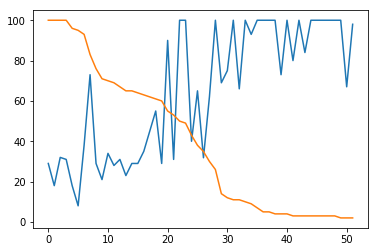

In [147]:
import matplotlib.pyplot as plt
plt.plot(merged_df['Participation_ACT'].values)

plt.plot(merged_df['Participation_SAT'].values)

plt.show()

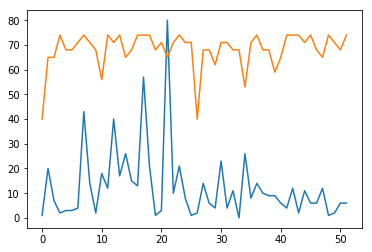

In [218]:
import matplotlib.pyplot as plt
plt.plot(merged_df['Pop'].values)

plt.plot(merged_df['Rtg'].values)
plt.show()

Here we have lined up population and credit-rating data to derive the priorities with which to approach business development.  The sales department should be directed towards states with smaller student populations, high ACT-participation rates and lower credit ratings.  When approached with the benefit of savings, some states would likely find it easier to switch from ACT-testing over to SAT-testing.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a10e0edd8>]],
      dtype=object)

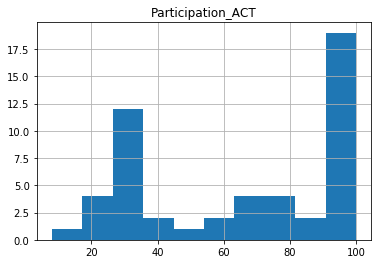

In [73]:
merged_df.hist(column='Participation_ACT')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1c3cb898>]],
      dtype=object)

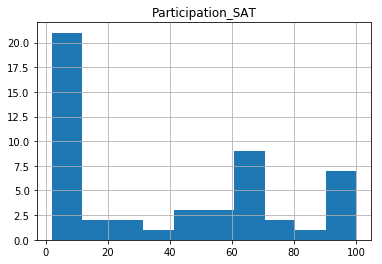

In [74]:
merged_df.hist(column='Participation_SAT')

Participation is bimodal and/or mutually exclusive.

##### 17. Plot the Math(s) distributions from both data sets.

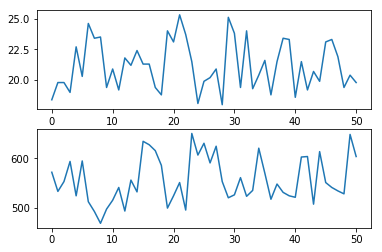

In [224]:
import matplotlib.pyplot as plt
plt.figure(1)
plt.subplot(211)
plt.plot(merged_df['Math_ACT'])

plt.subplot(212)
plt.plot(merged_df['Math_SAT'])
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a31eabe48>]],
      dtype=object)

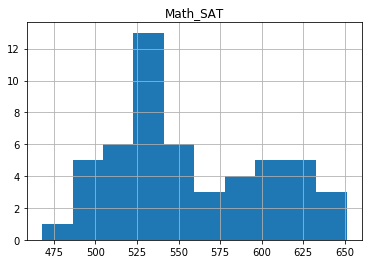

In [185]:
merged_df.hist(column='Math_SAT')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1c55d0f0>]],
      dtype=object)

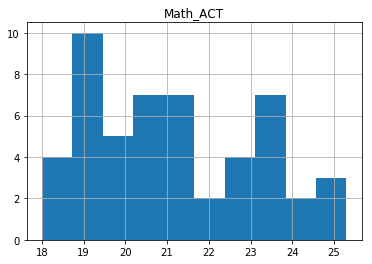

In [76]:
merged_df.hist(column='Math_ACT')

NOTE: Not much correlation...slightly negative if at all.

##### 18. Plot the Verbal distributions from both data sets.

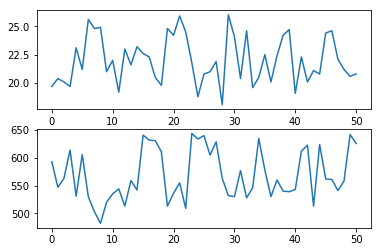

In [77]:
import matplotlib.pyplot as plt
plt.figure(1)
plt.subplot(211)
plt.plot(merged_df['Reading_ACT'])

plt.subplot(212)
plt.plot(merged_df['Evidence-Based Reading and Writing_SAT'])
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1c74d0b8>]],
      dtype=object)

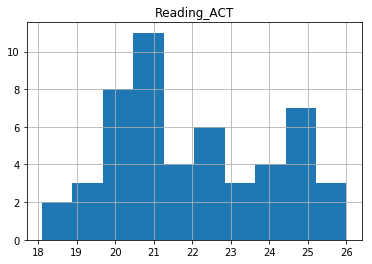

In [79]:
merged_df.hist(column='Reading_ACT')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a3189bf98>]],
      dtype=object)

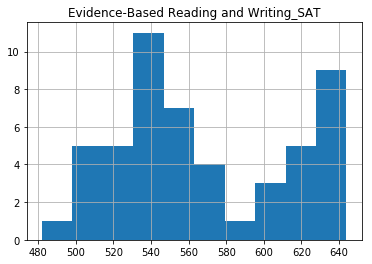

In [219]:
merged_df.hist(column='Evidence-Based Reading and Writing_SAT')

##### 19. When we make assumptions about how data are distributed, what is the most common assumption?

Non-Gaussian distributions prevail as shown above.  The impression is that the statistics applied should be stratified, and attributable to one group headed towards college and a second group that is not.

##### 20. Does this assumption hold true for any of our columns? Which?

##### 21. Plot some scatterplots examining relationships between all variables.

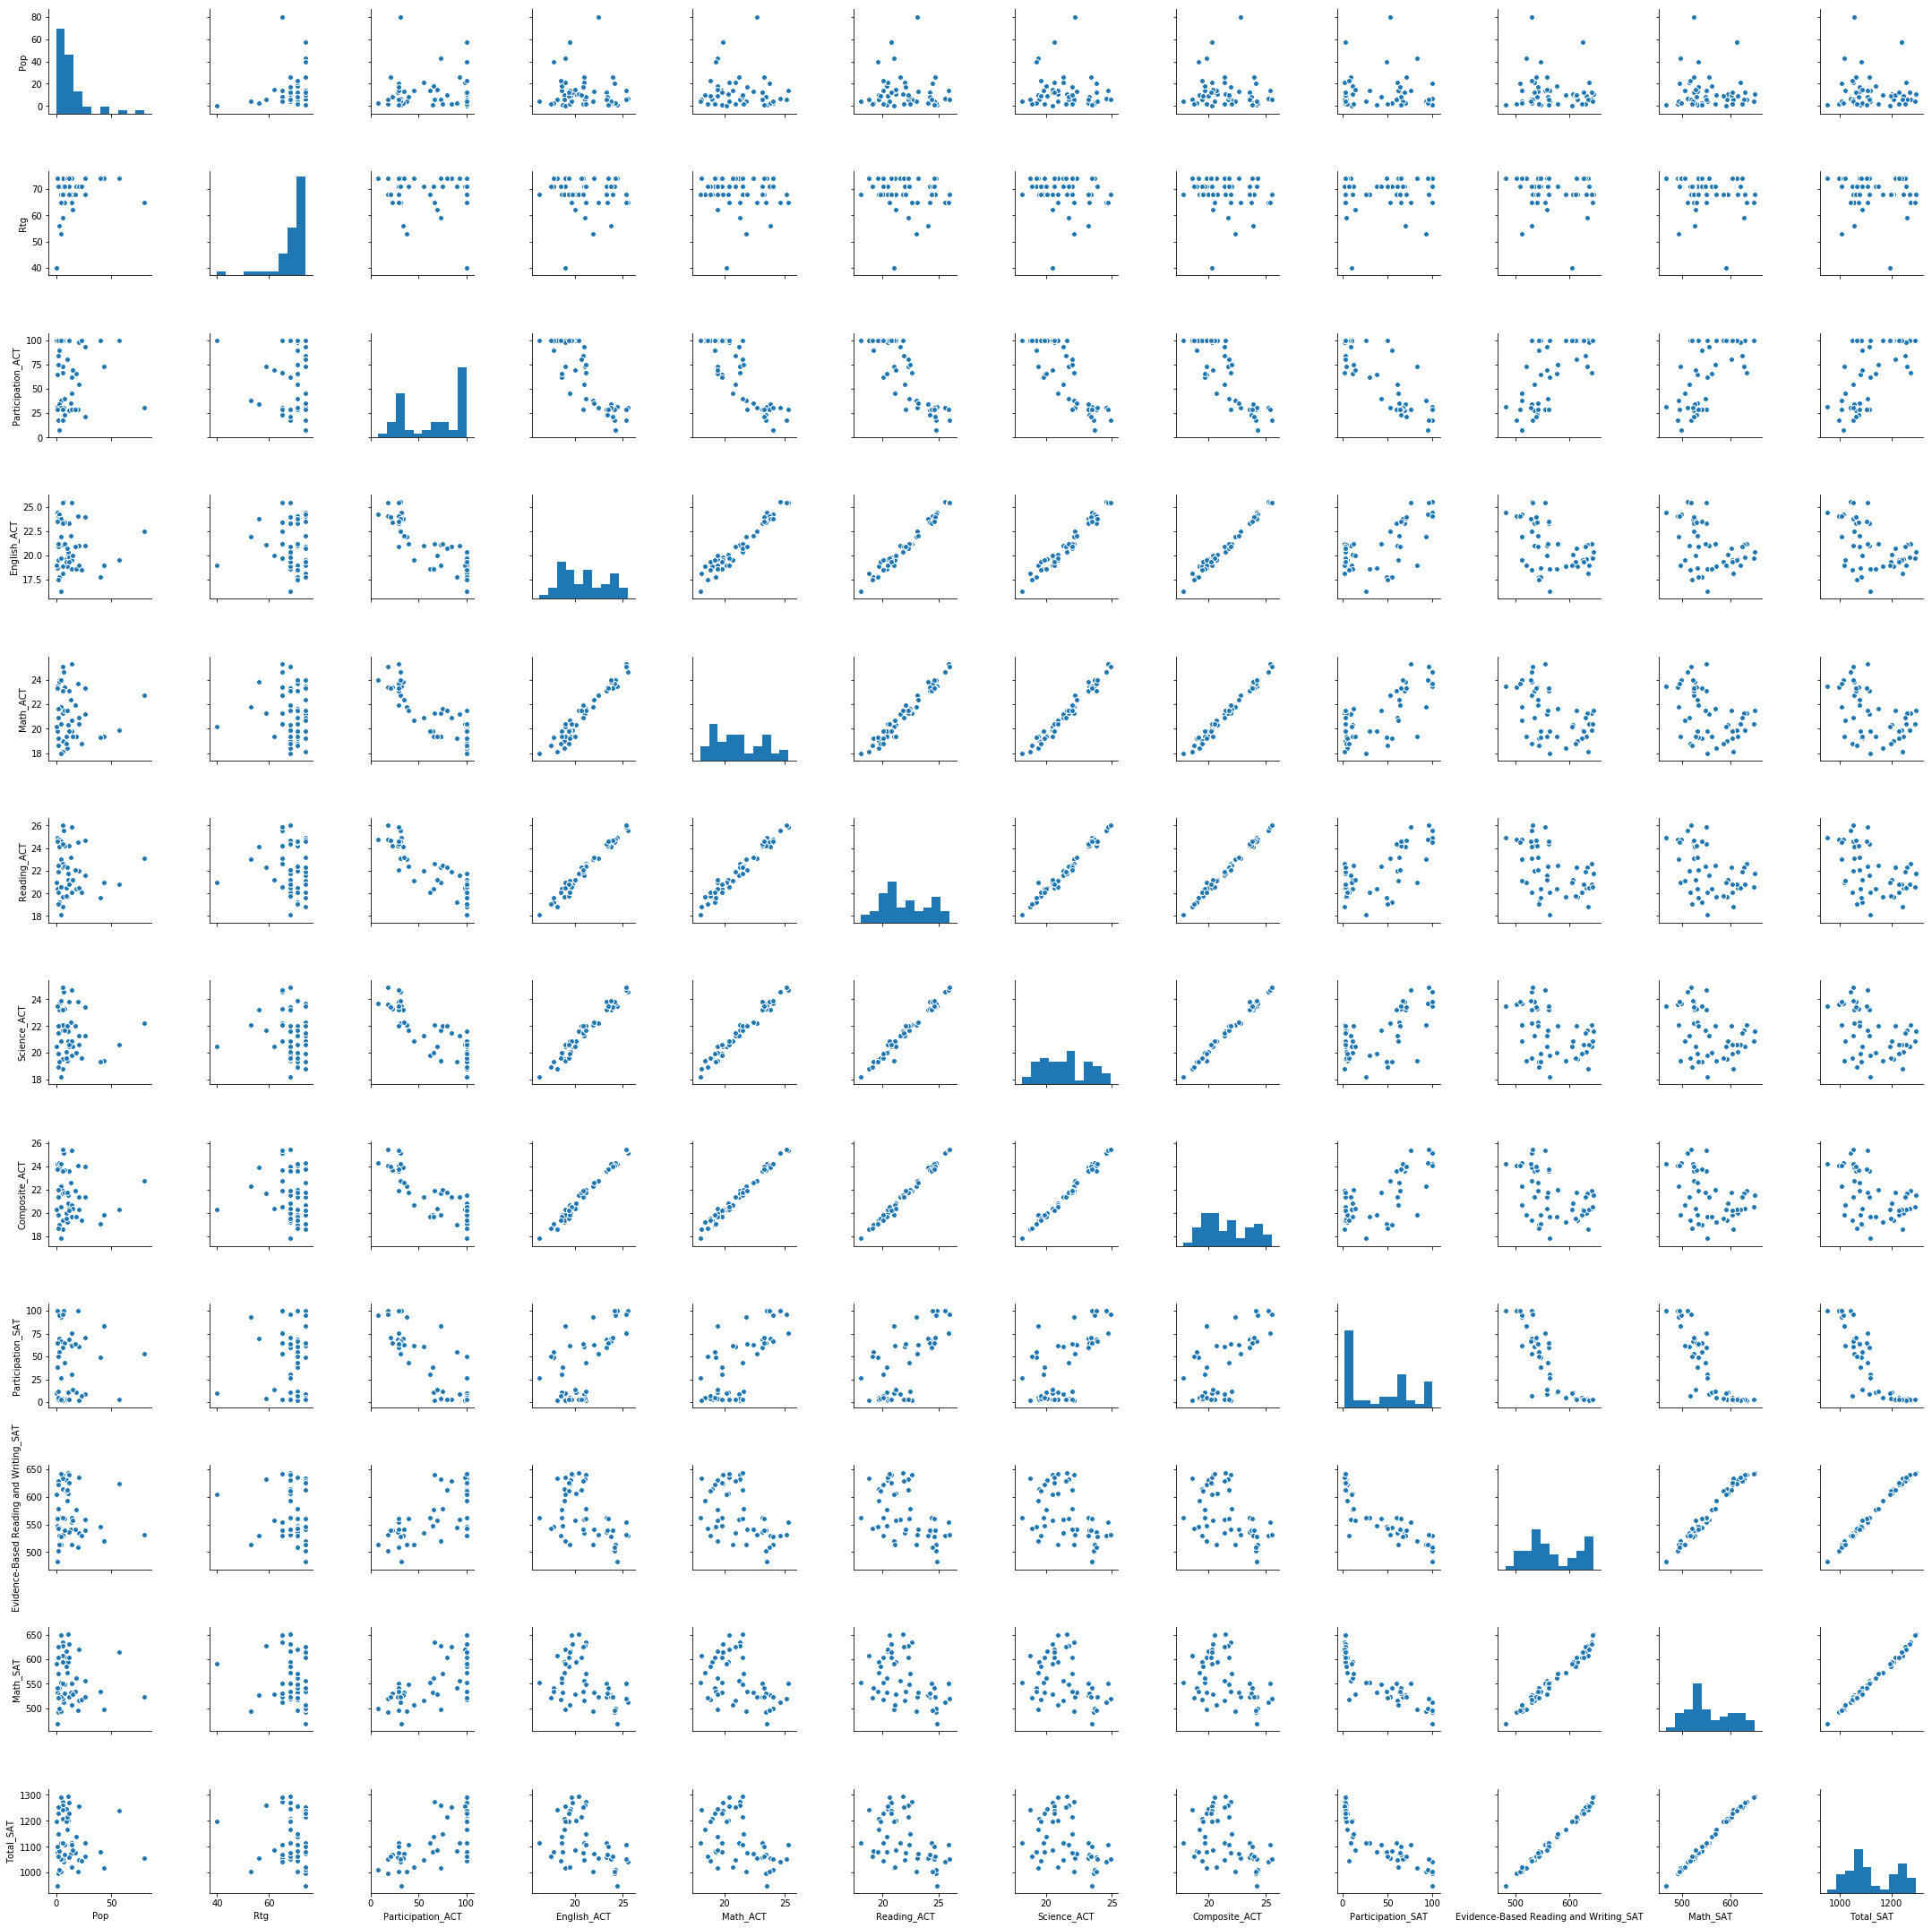

In [161]:
sns.pairplot(merged_df)

##### 22. Are there any interesting relationships to note?

There are outliers in the Maryland-data.

In [226]:
merged_df.loc[20,['Math_SAT']]=524

In [221]:
sat.loc[20,['Math']]=524

In [196]:
merged_df.loc[20,:]

State                                     Maryland
Participation_ACT                               28
English_ACT                                   23.3
Math_ACT                                      23.1
Reading_ACT                                   24.2
Science_ACT                                    2.3
Composite_ACT                                 23.6
Participation_SAT                               69
Evidence-Based Reading and Writing_SAT         536
Math_SAT                                       524
Total_SAT                                     1060
Name: 20, dtype: object

In [228]:
merged_df.loc[20,['Science_ACT']]=23.8

In [217]:
act.loc[20,['Math']]=24.

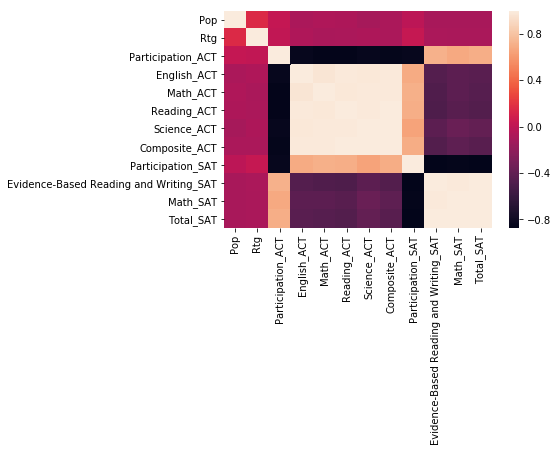

In [231]:
sns.heatmap(merged_df.corr())

There is strong correlation between the subject-scores and the composite/total values, as supported below.  This makes sense and reflects the level of effort students take to their studies generally.

This contrasts with the negative correlations between the participation rates and the scores and between the participation for the separate tests.  The references to the source data suggests a bias towards the individual initiative taken by students to performing well when commiting to testing that may not be required but desired for strengthening their college applications.

### Summary Relationships

Participation_ACT is inversely correlated with each of the individual subject scores, as well as the Participation_SAT scores.  However, Participatio_ACT was somewhat correlated with SAT scoring.

Where ACT participation is required, the best students also took the competing test and were more likely to do well.

Students who performed well in one subject did so for the other subjects for the same test.  On the other hand, the same successful students were less likely to do well in the other test.

# Research Notes

These tests have an outgoing purpose, to get a broad measure of the efficacy of high-school efficacy.  High schools largely rely on a single test for that assessment.  There is urgency to remediating low scores to serve students who may or may not be college-bound.

Is P(Participation|Composite-total) at work or P(Composite-total|Participation) the dynamic?  One author doesn't "think that there is a good way to infer causality in a fixed dataset using purely probabilistic/statistical principles." (https://www.quora.com/How-can-Bayes-theorem-be-interpreted-in-terms-of-inferring-causal-relationships-in-the-data)

Scores are a function of investment, for the college-bound.  For schools, investment follows the commitment to test broadly.

The only way to sell more investment is to focus on states that have made the commitment recently.  The way to drive that investment is to sell the broad-based benefits to the local economy.

The ONLY way to adress causality is to perform a controlled experiment, where you know, a priory, that only the arbitrarily changed condition (and nothing else) can be responsible for a possible change in the response. If you have only observational data (what is often the case in econometrics), you can only speculate or hypothesize about causal relations. A correlation of the respective variables would then be "in accordance" with such a speculation, but it will never be a proof, not even a strong support. (https://www.researchgate.net/post/Any_recommended_techniques_for_testing_causal_relations)  Also... "IMPORTANT: NO regression technique, NO statistical analysis at all can test a causal relationship."

The more advanced the remediation the less the urgency for investment because the efficacy is proven.  The advanced remediation sells itself.

In 2001, when states were first implementing statewide assessment programs, Illinois and Colorado decided that, rather than creating their own tests for high school juniors, they would contract with ACT, Inc. to use the ACT as a statewide assessment. (The ACT is generally considered more content based than the SAT, and therefore a better for for assessments.)  (https://blog.prepscholar.com/which-states-require-the-act-full-list-and-advice)  This plan had the added advantages of providing every student with the chance to take a college admissions test and, ideally, encouraging students who might not have otherwise considered college to apply.

Colorado and Illinois were followed by Kentucky, Wyoming, and Michigan (which switched to the SAT in 2016) in 2007 and then North Dakota and Tennessee in 2009. Since then, the number of states using the ACT as a statewide assessment has almost doubled, and the SAT has created an equivalent program called SAT School Day. The spread of the ACT as a state assessment has helped it surpass the SAT as the most popular college admissions test in the US.

Of the 12 states that administer the ACT statewide, more than half include the writing (the rest do not). There are also a few states that don't require the test of all students but allow districts to opt in to the program or give students the choice of which test to take.

Alabama

Arkansas: According to ACT, Inc., there are 16 other states that have instituted a similar statewide ACT program and which have effectively universal participation rates for public school graduates. Their composite scores range from a low of 17.8 (Nevada) to a high of 21.5 (Minnesota). Most of Arkansas's neighbors administer the test statewide, and Arkansas 19.4 average is comparable to those found in Louisiana (19.5), Mississippi (18.6), Missouri (20.4), Oklahoma (19.4) and Tennessee (19.8).  (https://www.arktimes.com/ArkansasBlog/archives/2017/09/07/arkansas-act-scores-decline-due-to-test-being-offered-to-all-students-officials-say)

Alignment (Tests should mirror curricula) (Participation is sponsored) :
PROVIDING ACCESS FOR ALL STUDENTS TO TAKE THE ACT: 37,985 of your students are included in this report (the 'cohort'). Increasing access insures that more students have the opportunity to consider college and allows the reader to use this report to evaluate how well courses and instructional programs are preparing students for college and work.
MAKING CORE CURRICULUM A PRIORITY: Emphasize the need for all students to develop college and work ready skills, regardless of postsecondary aspirations. 79% of the students in the cohort reported taking courses that would be considered 'Core or More' (Table 1.4).
MAKING SURE STUDENTS ARE TAKING THE RIGHT KINDS OF COURSES: Table 3.2 reports 4% of the cohort took less than three years of math courses. Of these students, 3% were college ready. 10% of the cohort reported taking a course sequence of Algebra I, Algebra II, and Geometry. 5% of these students were college ready. In comparison, 36% of the students who took 3 or more years of math beyond Algebra I, Algebra II, and Geometry were college ready. Getting more students ready for Algebra prior to 9th grade will increase the chances that students will be prepared for and take advanced-level math courses.
Similarly, Table 3.2 reports 15% of the cohort took less than three years of natural science courses. 15% of these students were college ready. In comparison, 34% of students who took at least three years of science coursework were college ready.
EVALUATING RIGOR OF COURSES: Table 2.6 reports the percentage of students falling in each of the ACT College Readiness Standards score ranges. For example, approximately 60% of the cohort fall into the lowest three Mathematics score ranges. To increase these students' achievement, identify the standards they should focus on next by accessing ACT's College Readiness Standards at www.act.org/standard.
PLAN GUIDANCE ACTIVITIES BASED ON STUDENTS' CAREER AND COLLEGE ASPIRATIONS: Data in Tables 4.1 and 4.2 enable the reader to determine if aspirations are consistent with academic performance and whether among students with similar aspirations, academic performance is consistent across racial/ethnic groups.
(https://www.act.org/content/dam/act/unsecured/documents/Natl-Scores-2014-Alabama.pdf)

Michigan: The move, which shocked some school officials, begins in spring 2016. It also means the ACT, which replaced the high school MEAP exam in 2007 and became a major piece of the state's testing system, could lose its dominance in Michigan. While most colleges and universities accept scores from both exams, the ACT has been the more popular exam.
(https://www.freep.com/story/news/local/michigan/2015/01/07/michigan-replaces-act-sat/21385299/)
"I've invested a lot of money and training into getting students ready to take the ACT," said Stephen Bigelow, principal at Cousino High School in Warren Consolidated Schools. "That isn't going to do us much good anymore."  Michigan is one of more than 40 states that have adopted the Common Core State Standards, a set of expectations of what students should know to be college ready. The SAT has been redesigned with those standards in mind.  (https://www.detroitnews.com/story/opinion/editorials/2015/01/09/michigan-chooses-sat-act/21458857/)
But the financial savings are real, and it would have been careless of state officials to ignore that. The MDE said the College Board, which administers the SAT, won the three-year contract worth $17.1 million — a bid that was $15 million less than the ACT.

Population :         http://worldpopulationreview.com/states/ 

Credit Ratings : https://www.revolvy.com/page/List-of-U.S.-state-budgets

In [269]:
merged_df.sort_values(by="Math_ACT", ascending=False, inplace=False).head()

,State,Pop,Rtg,Participation_ACT,English_ACT,Math_ACT,Reading_ACT,Science_ACT,Composite_ACT,Participation_SAT,Evidence-Based Reading and Writing_SAT,Math_SAT,Total_SAT
21,Massachusetts,14,65,29.0,25.4,25.3,25.9,24.7,25.4,76.0,555.0,551.0,1107.0
29,New Hampshire,6,68,18.0,25.4,25.1,26.0,24.9,25.5,96.0,532.0,520.0,1052.0
6,Connecticut,7,65,31.0,25.5,24.6,25.6,24.6,25.2,100.0,530.0,512.0,1041.0
19,Maine,3,74,8.0,24.2,24.0,24.8,23.7,24.3,95.0,513.0,499.0,1012.0
32,New York,4,71,31.0,23.8,24.0,24.6,23.9,24.2,67.0,528.0,523.0,1052.0


In [233]:
merged_df.sort_values(by="English_ACT", ascending=False, inplace=False).head()

,State,Pop,Rtg,Participation_ACT,English_ACT,Math_ACT,Reading_ACT,Science_ACT,Composite_ACT,Participation_SAT,Evidence-Based Reading and Writing_SAT,Math_SAT,Total_SAT
6,Connecticut,7,65,31.0,25.5,24.6,25.6,24.6,25.2,100.0,530.0,512.0,1041.0
29,New Hampshire,6,68,18.0,25.4,25.1,26.0,24.9,25.5,96.0,532.0,520.0,1052.0
21,Massachusetts,14,65,29.0,25.4,25.3,25.9,24.7,25.4,76.0,555.0,551.0,1107.0
8,District of Columbia,1,74,32.0,24.4,23.5,24.9,23.5,24.2,100.0,482.0,468.0,950.0
19,Maine,3,74,8.0,24.2,24.0,24.8,23.7,24.3,95.0,513.0,499.0,1012.0


In [234]:
merged_df.sort_values(by="Reading_ACT", ascending=False, inplace=False).head()

,State,Pop,Rtg,Participation_ACT,English_ACT,Math_ACT,Reading_ACT,Science_ACT,Composite_ACT,Participation_SAT,Evidence-Based Reading and Writing_SAT,Math_SAT,Total_SAT
29,New Hampshire,6,68,18.0,25.4,25.1,26.0,24.9,25.5,96.0,532.0,520.0,1052.0
21,Massachusetts,14,65,29.0,25.4,25.3,25.9,24.7,25.4,76.0,555.0,551.0,1107.0
6,Connecticut,7,65,31.0,25.5,24.6,25.6,24.6,25.2,100.0,530.0,512.0,1041.0
8,District of Columbia,1,74,32.0,24.4,23.5,24.9,23.5,24.2,100.0,482.0,468.0,950.0
7,Delaware,2,74,18.0,24.1,23.4,24.8,23.6,24.1,100.0,503.0,492.0,996.0


In [235]:
merged_df.sort_values(by="Science_ACT", ascending=False, inplace=False).head()

,State,Pop,Rtg,Participation_ACT,English_ACT,Math_ACT,Reading_ACT,Science_ACT,Composite_ACT,Participation_SAT,Evidence-Based Reading and Writing_SAT,Math_SAT,Total_SAT
29,New Hampshire,6,68,18.0,25.4,25.1,26.0,24.9,25.5,96.0,532.0,520.0,1052.0
21,Massachusetts,14,65,29.0,25.4,25.3,25.9,24.7,25.4,76.0,555.0,551.0,1107.0
6,Connecticut,7,65,31.0,25.5,24.6,25.6,24.6,25.2,100.0,530.0,512.0,1041.0
32,New York,4,71,31.0,23.8,24.0,24.6,23.9,24.2,67.0,528.0,523.0,1052.0
20,Maryland,12,71,28.0,23.3,23.1,24.2,23.8,23.6,69.0,536.0,524.0,1060.0


In [236]:
merged_df.sort_values(by="Composite_ACT", ascending=False, inplace=False).head()

,State,Pop,Rtg,Participation_ACT,English_ACT,Math_ACT,Reading_ACT,Science_ACT,Composite_ACT,Participation_SAT,Evidence-Based Reading and Writing_SAT,Math_SAT,Total_SAT
29,New Hampshire,6,68,18.0,25.4,25.1,26.0,24.9,25.5,96.0,532.0,520.0,1052.0
21,Massachusetts,14,65,29.0,25.4,25.3,25.9,24.7,25.4,76.0,555.0,551.0,1107.0
6,Connecticut,7,65,31.0,25.5,24.6,25.6,24.6,25.2,100.0,530.0,512.0,1041.0
19,Maine,3,74,8.0,24.2,24.0,24.8,23.7,24.3,95.0,513.0,499.0,1012.0
8,District of Columbia,1,74,32.0,24.4,23.5,24.9,23.5,24.2,100.0,482.0,468.0,950.0


In [237]:
merged_df.sort_values(by="Evidence-Based Reading and Writing_SAT", ascending=False, inplace=False).head()

,State,Pop,Rtg,Participation_ACT,English_ACT,Math_ACT,Reading_ACT,Science_ACT,Composite_ACT,Participation_SAT,Evidence-Based Reading and Writing_SAT,Math_SAT,Total_SAT
23,Minnesota,11,68,100.0,20.4,21.5,21.8,21.6,21.5,3.0,644.0,651.0,1295.0
49,Wisconsin,4,65,100.0,19.7,20.4,20.6,20.9,20.5,3.0,642.0,649.0,1291.0
15,Iowa,6,65,67.0,21.2,21.3,22.6,22.1,21.9,2.0,641.0,635.0,1275.0
25,Missouri,12,68,100.0,19.8,19.9,20.8,20.5,20.4,3.0,640.0,631.0,1271.0
34,North Dakota,21,71,98.0,19.0,20.4,20.5,20.6,20.3,2.0,635.0,621.0,1256.0


In [238]:
merged_df.sort_values(by="Math_SAT", ascending=False, inplace=False).head()

,State,Pop,Rtg,Participation_ACT,English_ACT,Math_ACT,Reading_ACT,Science_ACT,Composite_ACT,Participation_SAT,Evidence-Based Reading and Writing_SAT,Math_SAT,Total_SAT
23,Minnesota,11,68,100.0,20.4,21.5,21.8,21.6,21.5,3.0,644.0,651.0,1295.0
49,Wisconsin,4,65,100.0,19.7,20.4,20.6,20.9,20.5,3.0,642.0,649.0,1291.0
15,Iowa,6,65,67.0,21.2,21.3,22.6,22.1,21.9,2.0,641.0,635.0,1275.0
25,Missouri,12,68,100.0,19.8,19.9,20.8,20.5,20.4,3.0,640.0,631.0,1271.0
16,Kansas,6,59,73.0,21.1,21.3,22.3,21.7,21.7,4.0,632.0,628.0,1260.0


In [97]:
merged_df.sort_values(by="Total_SAT", ascending=False, inplace=False).head()

,State,Pop,Rtg,Participation_ACT,English_ACT,Math_ACT,Reading_ACT,Science_ACT,Composite_ACT,Participation_SAT,Evidence-Based Reading and Writing_SAT,Math_SAT,Total_SAT
23,Minnesota,11,68,100.0,20.4,21.5,21.8,21.6,21.5,3.0,644.0,651.0,1295.0
49,Wisconsin,4,65,100.0,19.7,20.4,20.6,20.9,20.5,3.0,642.0,649.0,1291.0
15,Iowa,6,65,67.0,21.2,21.3,22.6,22.1,21.9,2.0,641.0,635.0,1275.0
25,Missouri,12,68,100.0,19.8,19.9,20.8,20.5,20.4,3.0,640.0,631.0,1271.0
16,Kansas,6,59,73.0,21.1,21.3,22.3,21.7,21.7,4.0,632.0,628.0,1260.0


##### 23. Create box plots for each variable. 

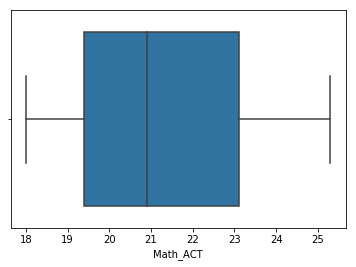

In [239]:
sns.boxplot(merged_df['Math_ACT'])

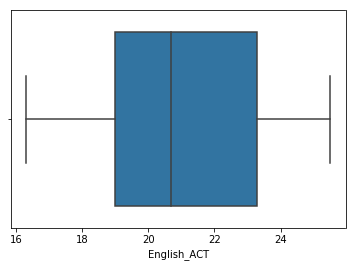

In [240]:
sns.boxplot(merged_df['English_ACT'])

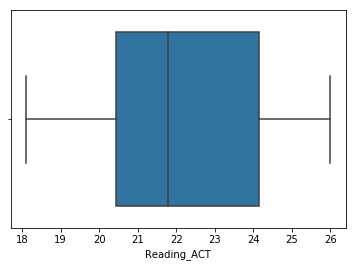

In [241]:
sns.boxplot(merged_df['Reading_ACT'])

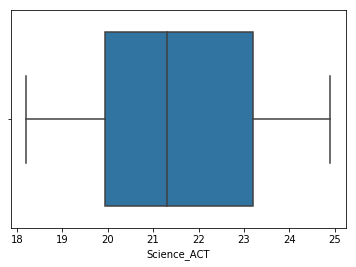

In [242]:
sns.boxplot(merged_df['Science_ACT'])

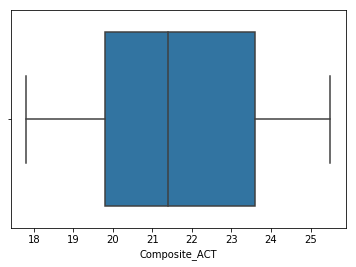

In [243]:
sns.boxplot(merged_df['Composite_ACT'])

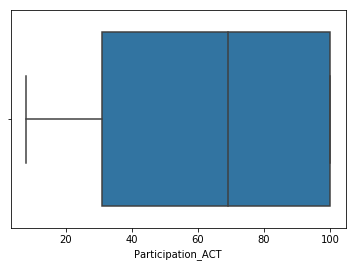

In [244]:
sns.boxplot(merged_df['Participation_ACT'])

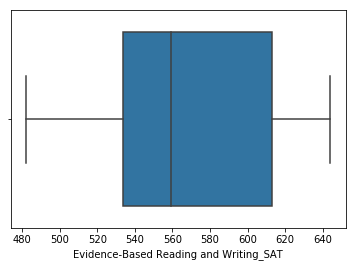

In [245]:
sns.boxplot(merged_df['Evidence-Based Reading and Writing_SAT'])

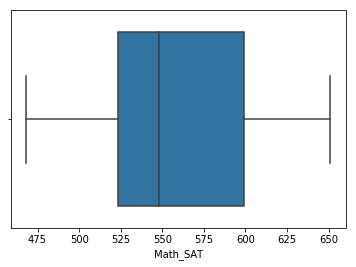

In [246]:
sns.boxplot(merged_df['Math_SAT'])

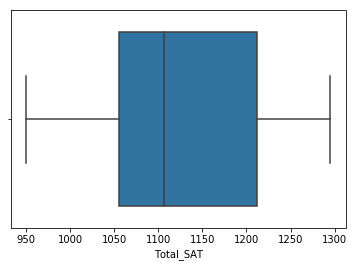

In [247]:
sns.boxplot(merged_df['Total_SAT'])

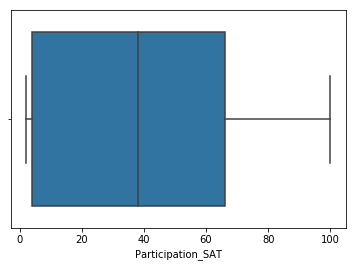

In [248]:
sns.boxplot(merged_df['Participation_SAT'])

The Participation rates for the SAT is markedly skewed to the right; the rates for the ACT data is also noticeably skewed, but towards the left.

##### BONUS: Using Tableau, create a heat map for each variable using a map of the US. 

n/a

## Step 4: Descriptive and Inferential Statistics

##### 24. Summarize each distribution. As data scientists, be sure to back up these summaries with statistics. (Hint: What are the three things we care about when describing distributions?)

In [250]:
act.iloc[:,2:].mean()

English      20.931373
Math         21.182353
Reading      22.013725
Science      21.462745
Composite    21.519608
dtype: float64

In [251]:
act.iloc[:,2:].median()

English      20.7
Math         20.9
Reading      21.8
Science      21.3
Composite    21.4
dtype: float64

In [252]:
act.iloc[:,2:].std()

English      2.353677
Math         1.981989
Reading      2.067271
Science      1.753392
Composite    2.020695
dtype: float64

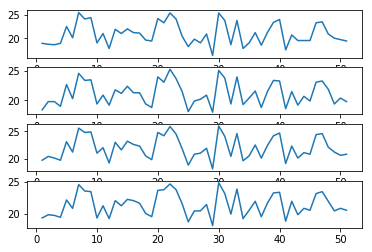

In [254]:
import matplotlib.pyplot as plt
plt.figure(1)
plt.subplot(411)
plt.plot(act['English'])

plt.subplot(412)
plt.plot(act['Math'])

plt.subplot(413)
plt.plot(act['Reading'])

plt.subplot(414)
plt.plot(act['Science'])

plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a279cefd0>]],
      dtype=object)

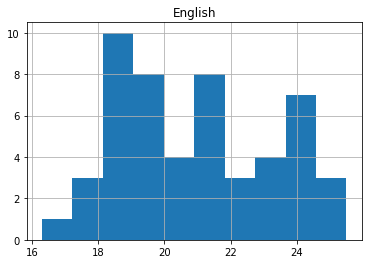

In [147]:
act.hist(column='English')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a3c81f860>]],
      dtype=object)

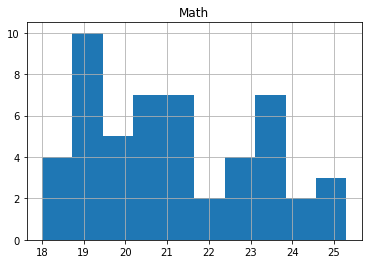

In [255]:
act.hist(column='Math')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a27c38198>]],
      dtype=object)

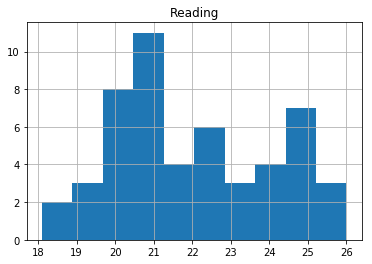

In [149]:
act.hist(column='Reading')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a3c810da0>]],
      dtype=object)

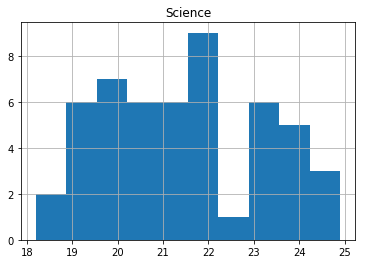

In [256]:
act.hist(column='Science')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a276534a8>]],
      dtype=object)

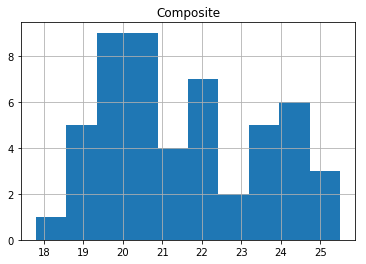

In [140]:
act.hist(column='Composite')

In [273]:
act.describe()

,Participation,English,Math,Reading,Science,Composite
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,65.254902,20.931373,21.182353,22.013725,21.462745,21.519608
std,32.140842,2.353677,1.981989,2.067271,1.753392,2.020695
min,8.000000,16.300000,18.000000,18.100000,18.200000,17.800000
25%,31.000000,19.000000,19.400000,20.450000,19.950000,19.800000
50%,69.000000,20.700000,20.900000,21.800000,21.300000,21.400000
75%,100.000000,23.300000,23.100000,24.150000,23.200000,23.600000
max,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000


The distribution of SAT-Total scores is broadly multi-modal and skewed to the right.  The English and Math distributions are fairly similar, unexpectedly.  The Science component is skewed to the left like the Math component for the SAT test, on the other hand.

In [258]:
sat.iloc[:,2:].mean()

Evidence-Based Reading and Writing     569.117647
Math                                   556.882353
Total                                 1126.098039
dtype: float64

In [259]:
sat.iloc[:,2:].median()

Evidence-Based Reading and Writing     559.0
Math                                   548.0
Total                                 1107.0
dtype: float64

In [260]:
sat.iloc[:,2:].std()

Evidence-Based Reading and Writing    45.666901
Math                                  47.121395
Total                                 92.494812
dtype: float64

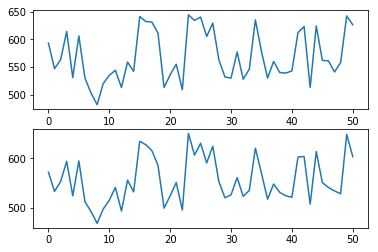

In [261]:
import matplotlib.pyplot as plt
plt.figure(1)
plt.subplot(211)
plt.plot(sat['Evidence-Based Reading and Writing'])

plt.subplot(212)
plt.plot(sat['Math'])

plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2726d518>]],
      dtype=object)

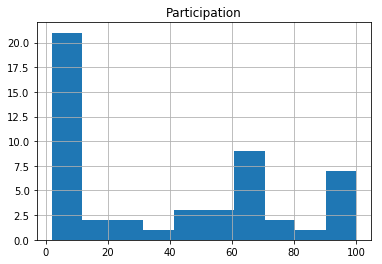

In [135]:
sat.hist(column='Participation')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a3cbf34a8>]],
      dtype=object)

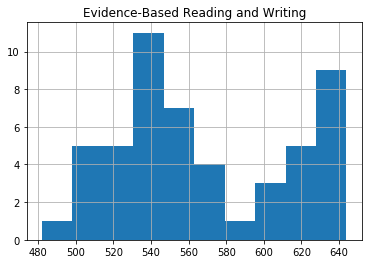

In [263]:
sat.hist(column='Evidence-Based Reading and Writing')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a3ccf55c0>]],
      dtype=object)

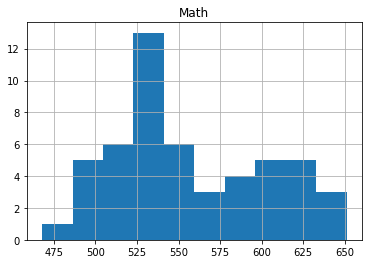

In [264]:
sat.hist(column='Math')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a27588ba8>]],
      dtype=object)

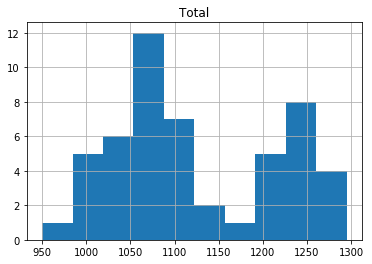

In [139]:
sat.hist(column='Total')

In [272]:
sat.describe()

,Participation,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000,51.000000
mean,39.803922,569.117647,556.882353,1126.098039
std,35.276632,45.666901,47.121395,92.494812
min,2.000000,482.000000,468.000000,950.000000
25%,4.000000,533.500000,523.500000,1055.500000
50%,38.000000,559.000000,548.000000,1107.000000
75%,66.000000,613.000000,599.000000,1212.000000
max,100.000000,644.000000,651.000000,1295.000000


The distribution of SAT-Total scores is clearly bimodal, dominated by the EBRW-distribution.

##### 25. Summarize each relationship. Be sure to back up these summaries with statistics.

The means and medians lie between the two peaks, as expected, so it is critical to look at the histogram plots.  There is strong correlation between the two test components of the SAT, as well as that for the ACT.

##### 26. Execute a hypothesis test comparing the SAT and ACT participation rates. Use $\alpha = 0.05$. Be sure to interpret your results.

In [118]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

print(np.mean(sat['Participation']) - np.mean(act['Participation']))

-25.450980392156858


In [111]:
t_stat, p_value = stats.ttest_ind(sat['Participation'], act['Participation'])
t_stat, p_value

(-3.8085778908170544, 0.00024134203698662353)

With a p-value of 0.024% there is evidence to reject the null hypothesis.

##### 27. Generate and interpret 95% confidence intervals for SAT and ACT participation rates.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a24f8f198>]],
      dtype=object)

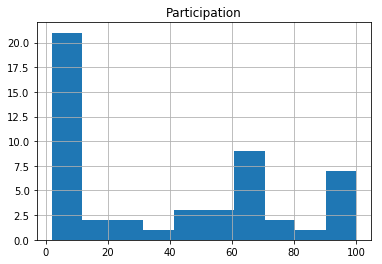

In [122]:
sat.hist(column='Participation')

In [116]:
n = len(sat['Participation'])
standard_error = np.std(sat['Participation'], ddof=1)/np.sqrt(n)
n

51

In [120]:
z = 1.96  # for 95%
ci_lower_SAT = np.mean(sat['Participation'])-z*standard_error
ci_upper_SAT = np.mean(sat['Participation'])+z*standard_error
ci_lower_SAT, ci_upper_SAT

(30.122077111168757, 49.48576602608615)

Regardless of the nature of the population distribution which appears multi-modal, if we calculate the sample means (each year?) for the entire country (50), the sample distribution should be normal, according to the CLT.  It follows that in 95% of the participation-rate samples of individual states, the SAT-mean of the sample can be expected to lie between 30.1% and 49.5%.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a26c9dfd0>]],
      dtype=object)

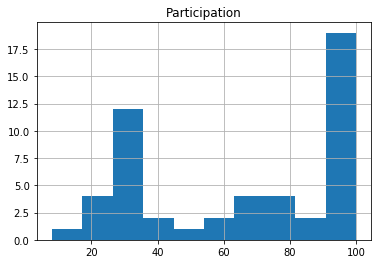

In [127]:
act.hist(column='Participation')

In [128]:
n = len(act['Participation'])
standard_error = np.std(act['Participation'], ddof=1)/np.sqrt(n)

In [129]:
z = 1.96  # for 95%
ci_lower_ACT = np.mean(act['Participation'])-z*standard_error
ci_upper_ACT = np.mean(act['Participation'])+z*standard_error
ci_lower_ACT, ci_upper_ACT

(56.43369049287186, 74.07611342869676)

Regardless of the nature of the population distribution which appears multi-modal, if we calculate the sample means (each year?) for the entire country (50), the sample distribution should be normal, according to the CLT. It follows that in 95% of the participation-rate samples of individual states, the ACT-mean of the sample can be expected to lie between 56.4% and 74.1%.

##### 28. Given your answer to 26, was your answer to 27 surprising? Why?

This was not surprising, since the data profiles showed many more states with 100% ACT-participation (17) compared to the number of states with 100% SAT-participation (4).

##### 29. Is it appropriate to generate correlation between SAT and ACT math scores? Why?

##### 30. Suppose we only seek to understand the relationship between SAT and ACT data in 2017. Does it make sense to conduct statistical inference given the data we have? Why?

No, not normal distribution.